In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
def yearly_zonal_averages(data):
    # Average over each year's monthly values to get the yearly values
    emission = data.resample(time="1YS").mean(dim="time")
    
    return zonal_average(emission)

def zonal_average(emission):
    # Average over lev
    # Create a weight array for the zonal average
    weight_emission = np.cos(np.deg2rad(emission.lat))
    weight_emission = weight_emission / weight_emission.sum()

    # Average over lon, zonal average over lan
    emission = emission.mean('lon')
    emission_weighted = np.sum(emission * weight_emission, axis=-1).compute()

    # Create xarray.DataArray with time coordinates
    emission_zonal_avg = xr.DataArray(emission_weighted, dims=['time'], coords={'time': emission['time']})
    
    return emission_zonal_avg

def zonal_average_old(emission):
    # Average over lev
    # Create a weight array for the zonal average
    weight_emission = np.cos(np.deg2rad(emission.lat))
    weight_emission = weight_emission / weight_emission.sum() 

    # Average over lon, zonal average over lan
    emission = emission.mean('lon')
    emission_weighted = []
    for year in range(emission.shape[0]):
        emission_year_weighted = np.sum(emission[year, :] * weight_emission).compute().data.item()
        emission_weighted.append(emission_year_weighted)
        
    return emission_weighted 

In [3]:
specie = 'BC'

In [4]:
path_ssp126 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_BC_SSP126_yearly.nc'
path_ssp245 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_BC_SSP245_yearly.nc'
path_ssp370 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_BC_SSP370_yearly.nc'
path_ssp460 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_BC_SSP460_yearly.nc'
path_ssp585 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_BC_SSP585_yearly.nc'

In [5]:
data_ssp126 = xr.open_dataset(path_ssp126)['s3']
data_ssp245 = xr.open_dataset(path_ssp245)['s3']
data_ssp370 = xr.open_dataset(path_ssp370)['s3']
data_ssp460 = xr.open_dataset(path_ssp460)['s3']
data_ssp585 = xr.open_dataset(path_ssp585)['s3']

In [6]:
data_ssp370

<xarray.DataArray 's3' (time: 10, lat: 360, lon: 720)>
[2592000 values with dtype=float32]
Coordinates:
  * time     (time) object 2015-01-16 00:00:00 ... 2100-01-16 00:00:00
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Attributes:
    units:             Tg
    sector_name:       Transportation
    standard_name:     tendency_of_atmosphere_mass_content_of_black_carbon_dr...
    cell_methods:      time: mean sector: mean
    long_name:         BC anthropogenic emissions from sector s3
    molecular_weight:  12.0

In [7]:
europe_ssp126 = data_ssp126.sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))
europe_ssp245 = data_ssp245.sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))
europe_ssp370 = data_ssp370.sel(lon=slice(-20, 20)).sel(lat=slice(-20, ))
europe_ssp460 = data_ssp460.sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))
europe_ssp585 = data_ssp585.sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))

In [ ]:
20W 20E, 20N -5N  

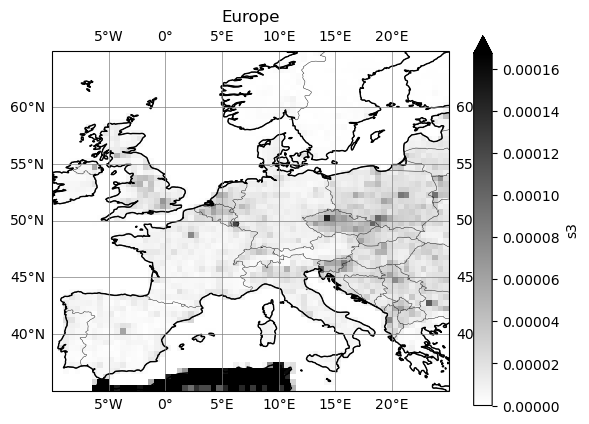

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
europe_ssp370.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'binary', robust=True) 
ax.set_title('Europe')

ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                 xlocs=range(-180,180,5), ylocs=range(-90,90,5))
ax.coastlines(resolution='50m', linewidth=1, color='black')

In [9]:
europe_ssp126_zonal = zonal_average(europe_ssp126)
europe_ssp245_zonal = zonal_average(europe_ssp245)
europe_ssp370_zonal = zonal_average(europe_ssp370)
europe_ssp460_zonal = zonal_average(europe_ssp460)
europe_ssp585_zonal = zonal_average(europe_ssp585)

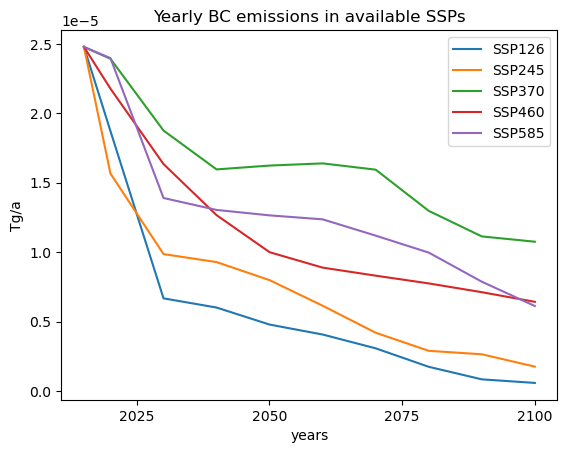

In [10]:
europe_ssp126_zonal.plot(label='SSP126')
europe_ssp245_zonal.plot(label='SSP245')
europe_ssp370_zonal.plot(label='SSP370')
europe_ssp460_zonal.plot(label='SSP460')
europe_ssp585_zonal.plot(label='SSP585')

plt.title('Yearly '+specie+' emissions in available SSPs')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [11]:
path_ceds = '/work/bd1063/b309253/emissions/regional/CEDS_Glb_0.5x0.5_anthro_BC__yearly.nc'

In [12]:
data_ceds = xr.open_dataset(path_ceds)
data_ceds

<xarray.Dataset>
Dimensions:         (time: 70, lat: 360, lon: 720)
Coordinates:
  * time            (time) object 1950-01-16 00:00:00 ... 2019-01-16 00:00:00
  * lat             (lat) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * lon             (lon) float32 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
Data variables:
    transportation  (time, lat, lon) float32 ...
Attributes: (12/37)
    Conventions:                 CF-1.6
    activity_id:                 input4MIPs
    comment:                     This data supersedes 2016-06-18, 2016-06-18-...
    contact:                     Steven J Smith (ssmith@pnnl.gov)
    creation_date:               2021-04-21T22:26:22Z
    data_structure:              grid
    ...                          ...
    references:                  https://doi.org/10.25584/PNNLDataHub/1779095
    nco_openmp_thread_number:    1
    NCO:                         netCDF Operators version 4.7.5 (Homepage = h...
    distribution_date:           2023-11-27
    history:                     2022-02-23: Processed by ECCAD from original...
    compress_level:              5

In [13]:
ceds_europe = data_ceds['transportation'].sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))

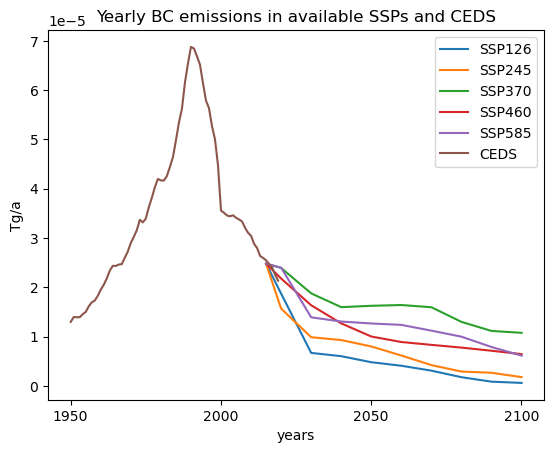

In [14]:
zonal_average(europe_ssp126).plot(label='SSP126')
zonal_average(europe_ssp245).plot(label='SSP245')
zonal_average(europe_ssp370).plot(label='SSP370')
zonal_average(europe_ssp460).plot(label='SSP460')
zonal_average(europe_ssp585).plot(label='SSP585')
zonal_average(ceds_europe).plot(label='CEDS')

plt.title('Yearly '+specie+' emissions in available SSPs and CEDS')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [15]:
path_cams5 = '/work/bd1063/b309253/emissions/regional/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_bc_v5.3_yearly.nc'
path_cams6 = '/work/bd1063/b309253/emissions/regional/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_bc_v6.1_yearly.nc'

In [16]:
data_cams5 = xr.open_dataset(path_cams5)
data_cams6 = xr.open_dataset(path_cams6)

In [17]:
cams5_transport = data_cams5['tnr'] + data_cams5['tro']
cams6_transport = data_cams6['tnr'] + data_cams6['tro']

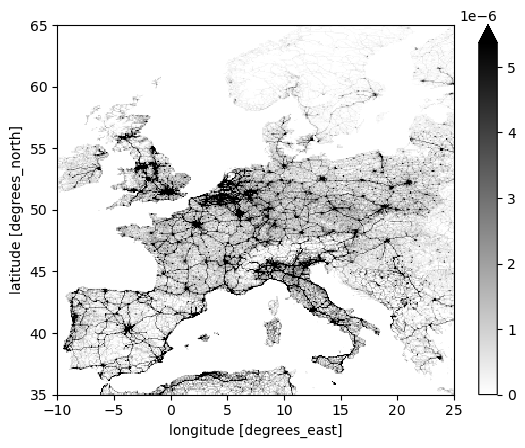

In [18]:
cams5_transport.sel(lon=slice(-10, 25)).sel(lat=slice(35, 65)).mean('time').plot(robust = True, cmap='binary')

In [132]:
cams5_transport_europe = zonal_average(cams5_transport.sel(lon=slice(-10, 25)).sel(lat=slice(35, 65)))
cams6_transport_europe = zonal_average(cams6_transport.sel(lon=slice(-10, 25)).sel(lat=slice(35, 65)))

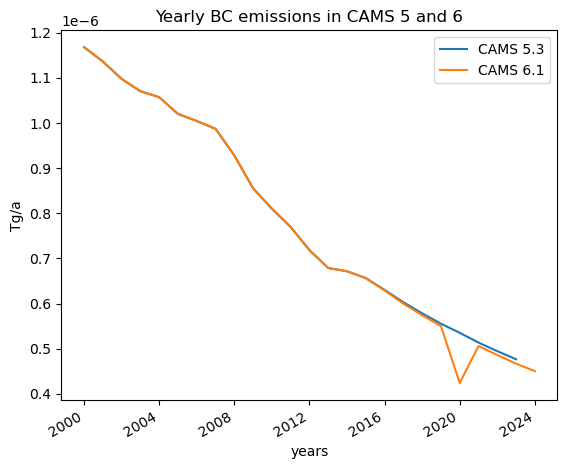

In [133]:
cams5_transport_europe.plot(label ='CAMS 5.3')
cams6_transport_europe.plot(label='CAMS 6.1')

plt.title('Yearly '+specie+' emissions in CAMS 5 and 6')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## ECLIPSE

In [134]:
eclipse5_slcp_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-GAINS-V5a_Glb_0.5x0.5_anthro_BC_SLCP_yearly.nc'
eclipse5_cle_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-GAINS-V5a_Glb_0.5x0.5_anthro_BC_CLE_yearly.nc'
eclipse5_mfr_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-GAINS-V5a_Glb_0.5x0.5_anthro_BC_MFR_yearly.nc'
eclipse5_cle_2degrees_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-GAINS-V5a_Glb_0.5x0.5_anthro_BC_CLE-2degrees_yearly.ncc'
eclipse6_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-V6_Glb_0.5x0.5_anthro_BC_CLE_yearly.nc'

In [135]:
europe_eclipse5_slcp = xr.open_dataset(eclipse5_slcp_path)['emis_tra'].sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))
europe_eclipse5_cle = xr.open_dataset(eclipse5_cle_path)['emis_tra'].sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))
europe_eclipse5_mfr = xr.open_dataset(eclipse5_mfr_path)['emis_tra'].sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))
europe_eclipse5_cle_2degrees = xr.open_dataset(eclipse5_slcp_path)['emis_tra'].sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))
europe_eclipse6 = xr.open_dataset(eclipse6_path)['emis_tra'].sel(lon=slice(-10, 25)).sel(lat=slice(35, 65))

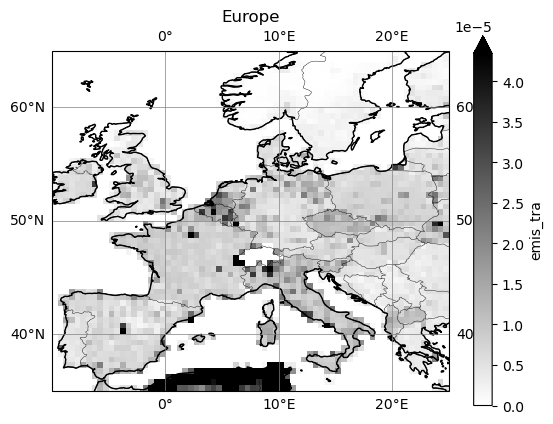

In [136]:
ax = plt.axes(projection=ccrs.PlateCarree())
europe_eclipse5_slcp.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'binary', robust=True) 
ax.set_title('Europe')

ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                 xlocs=range(-180,180,10), ylocs=range(-90,90,10))
ax.coastlines(resolution='50m', linewidth=1, color='black')

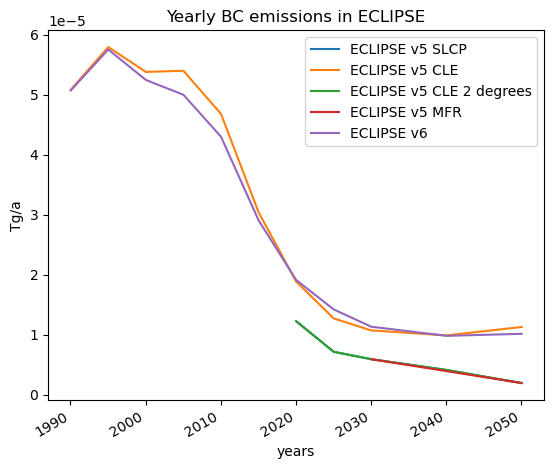

In [137]:
zonal_average(europe_eclipse5_slcp).plot(label='ECLIPSE v5 SLCP')
zonal_average(europe_eclipse5_cle).plot(label='ECLIPSE v5 CLE')
zonal_average(europe_eclipse5_cle_2degrees).plot(label='ECLIPSE v5 CLE 2 degrees')
zonal_average(europe_eclipse5_mfr).plot(label='ECLIPSE v5 MFR')
zonal_average(europe_eclipse6).plot(label='ECLIPSE v6')

plt.title('Yearly '+specie+' emissions in ECLIPSE')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## EDGAR

In [25]:
edgar6_path = '/work/bd1063/b309253/emissions/regional/EDGARv6_Glb_0.1x0.1_anthro_BC__yearly.nc'

In [26]:
data_edgar6 = xr.open_dataset(edgar6_path)

In [27]:
edgar6_transport = data_edgar6['tnr_other'] + data_edgar6['tro_nores']

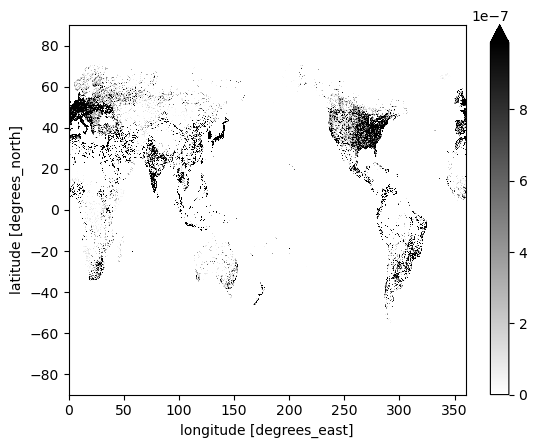

In [28]:
edgar6_transport.mean('time').plot(robust = True, cmap='binary')

In [29]:
edgar6_transport.coords['lon'] = (edgar6_transport.coords['lon'] + 180) % 360 - 180
edgar6_transport = edgar6_transport.sortby(edgar6_transport.lon)

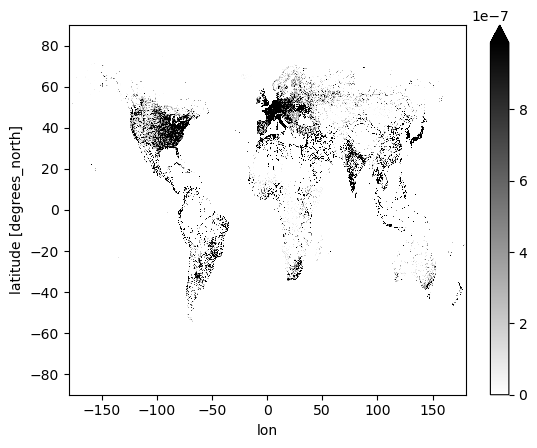

In [30]:
edgar6_transport.mean('time').plot(robust = True, cmap='binary')

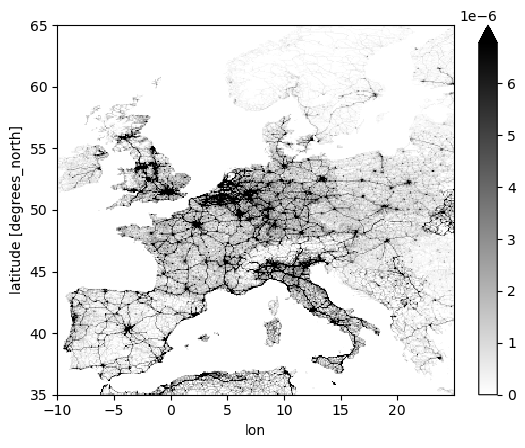

In [109]:
edgar6_transport.sel(lon=slice(-10, 25)).sel(lat=slice(35, 65)).mean('time').plot(robust = True, cmap='binary')

In [139]:
europe_edgar6 = zonal_average(edgar6_transport.sel(lon=slice(-10, 25)).sel(lat=slice(35, 65)))

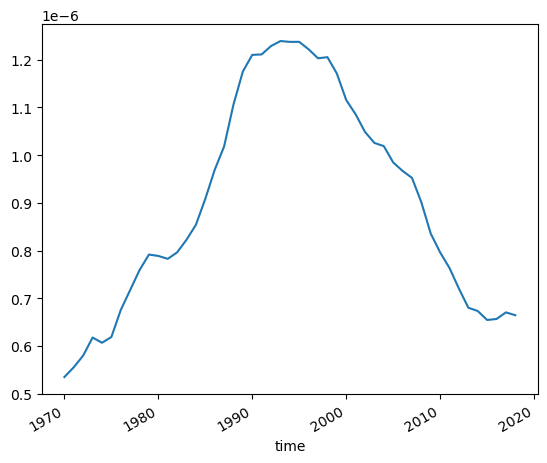

In [117]:
europe_edgar6.plot()

In [118]:
from datetime import datetime
import cftime

In [119]:
europe_edgar6['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in europe_edgar6['time'].values]

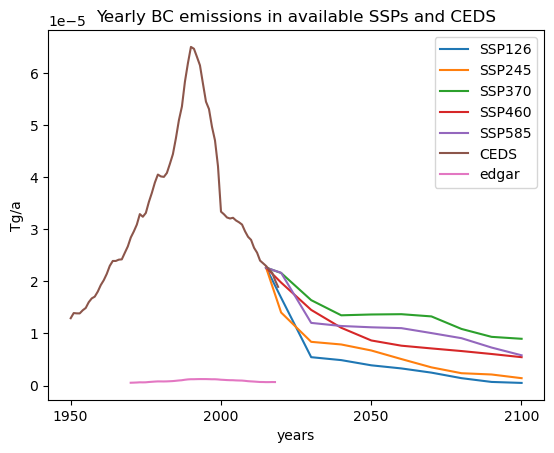

In [120]:
europe_ssp126.mean('lat').mean('lon').plot(label='SSP126')
europe_ssp245.mean('lat').mean('lon').plot(label='SSP245')
europe_ssp370.mean('lat').mean('lon').plot(label='SSP370')
europe_ssp460.mean('lat').mean('lon').plot(label='SSP460')
europe_ssp585.mean('lat').mean('lon').plot(label='SSP585')
ceds_europe.mean('lon').mean('lat').plot(label='CEDS')
europe_edgar6.plot(label='edgar')

plt.title('Yearly '+specie+' emissions in available SSPs and CEDS')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))